In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


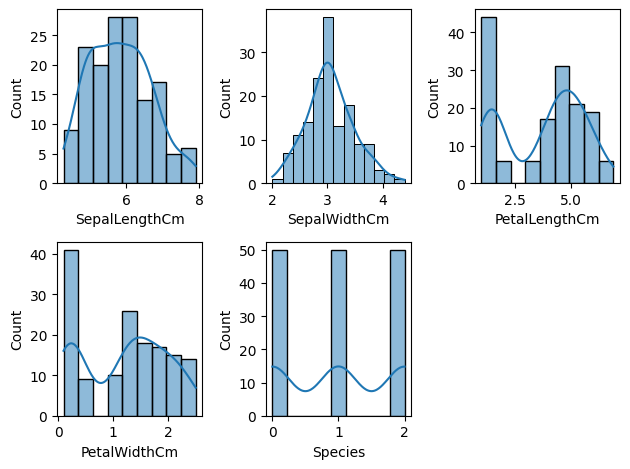

In [9]:
var = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']
def plotting(var,num):  # Function to plot histograms with KDE for specified variables.
    plt.subplot(2,3,num)
    sns.histplot(df[var], kde=True)

plotting('SepalLengthCm', 1)
plotting('SepalWidthCm', 2)
plotting('PetalLengthCm', 3)
plotting('PetalWidthCm', 4)
plotting('Species', 5)

plt.tight_layout() # Adjust layout to prevent overlap.
plt.show() # Display the plots.
    

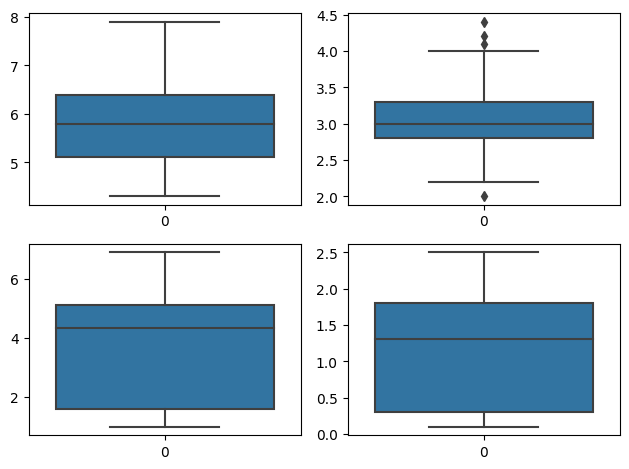

In [10]:
var = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
def plotting(var,num):  # Function to plot histograms with KDE for specified variables.
    plt.subplot(2,2,num)
    sns.boxplot(df[var])

plotting('SepalLengthCm', 1)
plotting('SepalWidthCm', 2)
plotting('PetalLengthCm', 3)
plotting('PetalWidthCm', 4)


plt.tight_layout() # Adjust layout to prevent overlap.
plt.show() # Display the plots.

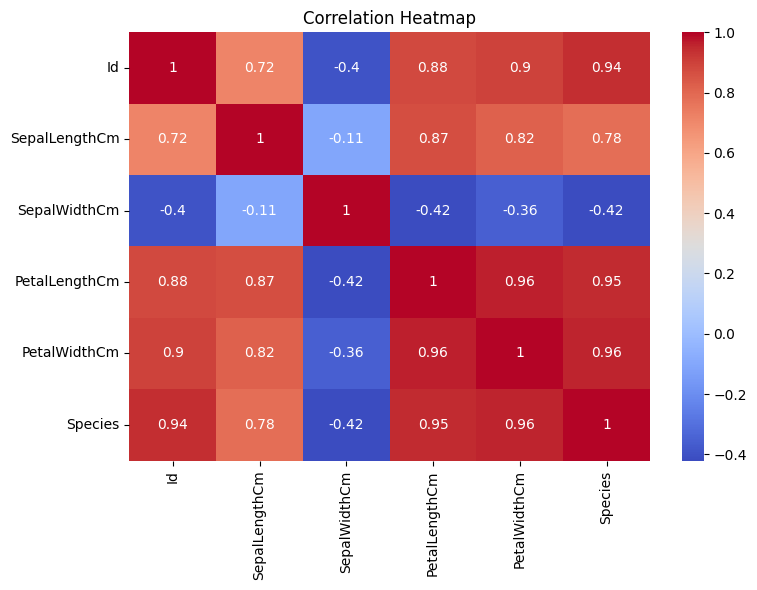

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')   # This is for comparison
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

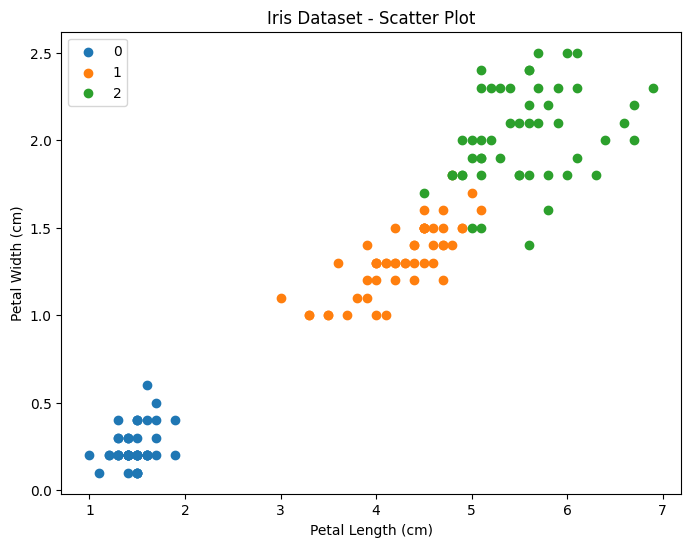

In [12]:
plt.figure(figsize=(8,6))
for species in df["Species"].unique():
    subset = df[df["Species"] == species]
    plt.scatter(subset["PetalLengthCm"], subset["PetalWidthCm"], label=species)

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Dataset - Scatter Plot")
plt.legend()
plt.show()

In [13]:
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [14]:
X = df.drop('Species',axis = 1)
y  = df['Species']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)   # use transform, not fit_transform



models = {
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes" : GaussianNB(),   # fixed spelling
    "Decision Tree" : DecisionTreeClassifier(),
    "SVM (RBF Kernel)" : SVC(probability=True)
}



results = []
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # added average
    results.append({
        'model': name,
        'Accuracy': round(acc, 4),
        'f1 score': round(f1, 4)
    })

In [17]:
results

[{'model': 'Logistic Regression', 'Accuracy': 1.0, 'f1 score': 1.0},
 {'model': 'KNN', 'Accuracy': 1.0, 'f1 score': 1.0},
 {'model': 'Naive Bayes', 'Accuracy': 1.0, 'f1 score': 1.0},
 {'model': 'Decision Tree', 'Accuracy': 1.0, 'f1 score': 1.0},
 {'model': 'SVM (RBF Kernel)', 'Accuracy': 1.0, 'f1 score': 1.0}]

In [18]:
cv_results = []
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results.append({
        'model': name,
        'CV mean accuracy': round(scores.mean(), 4),
        'CV std dev': round(scores.std(), 4)   # variability
    })


In [19]:
cv_results

[{'model': 'Logistic Regression',
  'CV mean accuracy': 0.94,
  'CV std dev': 0.0742},
 {'model': 'KNN', 'CV mean accuracy': 0.8733, 'CV std dev': 0.1555},
 {'model': 'Naive Bayes', 'CV mean accuracy': 0.9933, 'CV std dev': 0.0133},
 {'model': 'Decision Tree', 'CV mean accuracy': 0.9333, 'CV std dev': 0.0816},
 {'model': 'SVM (RBF Kernel)',
  'CV mean accuracy': 0.8667,
  'CV std dev': 0.1633}]

In [20]:
# 1. KNN

knn_params = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance']
}
knn_random = RandomizedSearchCV(
    KNeighborsClassifier(),
    knn_params,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)
knn_random.fit(X, y)
print("Best KNN params (Random):", knn_random.best_params_)
print("Best KNN accuracy (Random):", knn_random.best_score_)



# 2. Decision Tree

dt_params = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt_random = RandomizedSearchCV(
    DecisionTreeClassifier(),
    dt_params,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)
dt_random.fit(X, y)
print("Best Decision Tree params (Random):", dt_random.best_params_)
print("Best Decision Tree accuracy (Random):", dt_random.best_score_)



# 3. SVM (RBF)

svm_params = {
    'C': np.logspace(-2, 2, 10),
    'gamma': np.logspace(-3, 1, 10),
    'kernel': ['rbf']
}
svm_random = RandomizedSearchCV(
    SVC(),
    svm_params,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)
svm_random.fit(X, y)
print("Best SVM params (Random):", svm_random.best_params_)
print("Best SVM accuracy (Random):", svm_random.best_score_)


Best KNN params (Random): {'weights': 'uniform', 'n_neighbors': 14}
Best KNN accuracy (Random): 0.8799999999999999
Best Decision Tree params (Random): {'min_samples_split': 2, 'max_depth': None, 'criterion': 'entropy'}
Best Decision Tree accuracy (Random): 0.9333333333333333
Best SVM params (Random): {'kernel': 'rbf', 'gamma': 0.021544346900318832, 'C': 35.93813663804626}
Best SVM accuracy (Random): 0.8733333333333333


In [21]:
# 1️. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# 2️. Scale features (important for KNN & SVM, not needed for Decision Tree but we keep consistent)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# 3️. Best models from RandomizedSearchCV (you already found them)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

best_knn = KNeighborsClassifier(n_neighbors=14, weights='uniform')
best_dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, criterion='entropy')
best_svm = SVC(kernel='rbf', C=35.93813663804626, gamma=0.021544346900318832, probability=True)

models = {
    "KNN": best_knn,
    "Decision Tree": best_dt,
    "SVM (RBF)": best_svm
}



# 4. Train + Evaluate on test set
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")   # for multiclass
    
    results.append({
        "Model": name,
        "Test Accuracy": round(acc, 4),
        "Test F1 Score": round(f1, 4)
    })

    
    print(f"\n{name} Results:")
    print("Accuracy:", round(acc, 4))
    print("F1 Score:", round(f1, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

print("\nFinal Comparison:", results)



KNN Results:
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Decision Tree Results:
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      